In [6]:
from imports import *

In [7]:
MAPPINGS = json.load(open(DATA_DIR+'translation_mappings.json'))
joints = ["mid_hip", "mid_shoulder", "right_shoulder", "right_elbow", "right_wrist",
          "left_shoulder", "left_elbow", "left_wrist", "right_hip", "right_knee", "right_ankle",
          "left_hip", "left_knee", "left_ankle"]

df1 = pd.read_excel(EXCEL_DATA_DIR + 'Techniek_aanval_met_sprong_Ref_POSE_tabel.xlsx', index_col=0)
df1.rename(columns=MAPPINGS, inplace=True)
df2 = pd.read_excel(EXCEL_DATA_DIR + 'GX010044_Clip_6_POSE_tabel.xlsx', index_col=0)
df2.rename(columns=MAPPINGS, inplace=True)

df1['mid_hip_x'] = (df1['left_hip_x'] + df1['right_hip_x']) / 2
df1['mid_hip_y'] = (df1['left_hip_y'] + df1['right_hip_y']) / 2
df1['mid_shoulder_x'] = (df1['left_shoulder_x'] + df1['right_shoulder_x']) / 2
df1['mid_shoulder_y'] = (df1['left_shoulder_y'] + df1['right_shoulder_y']) / 2

df1.drop(columns=[
                # 'nose_x', 'nose_y', 
                'ball_position_x', 'ball_position_y',
                'right_eye_x', 'right_eye_y', 'left_eye_x', 'left_eye_y',
                'right_ear_x', 'right_ear_y', 'left_ear_x', 'left_ear_y'], inplace=True)

df2['mid_hip_x'] = (df2['left_hip_x'] + df2['right_hip_x']) / 2
df2['mid_hip_y'] = (df2['left_hip_y'] + df2['right_hip_y']) / 2
df2['mid_shoulder_x'] = (df2['left_shoulder_x'] + df2['right_shoulder_x']) / 2
df2['mid_shoulder_y'] = (df2['left_shoulder_y'] + df2['right_shoulder_y']) / 2

df2.drop(columns=[
                # 'nose_x', 'nose_y', 
                'ball_position_x', 'ball_position_y',
                'right_eye_x', 'right_eye_y', 'left_eye_x', 'left_eye_y',
                'right_ear_x', 'right_ear_y', 'left_ear_x', 'left_ear_y'], inplace=True)

df1_agg, _ = aggregate_all_numeric_columns(df1, 24, 24)
df2_agg, _ = aggregate_all_numeric_columns(df2, 60, 24)

print(len(df1_agg), len(df2_agg))

91 73


In [8]:
df1 = bbox_normalize_joint_coordinates(df1)
df2_agg = bbox_normalize_joint_coordinates(df2_agg)

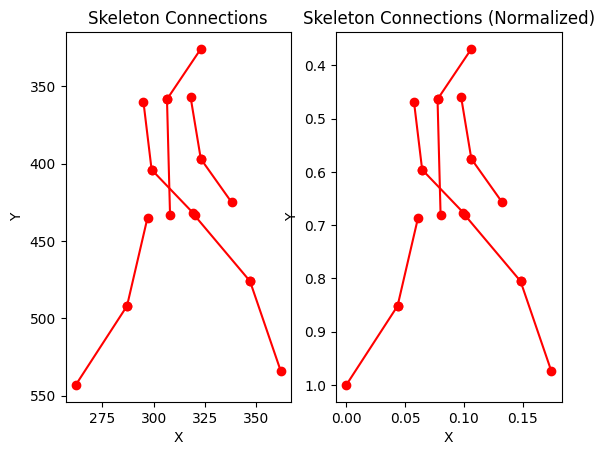

In [9]:
plot_frame(df1, 0)

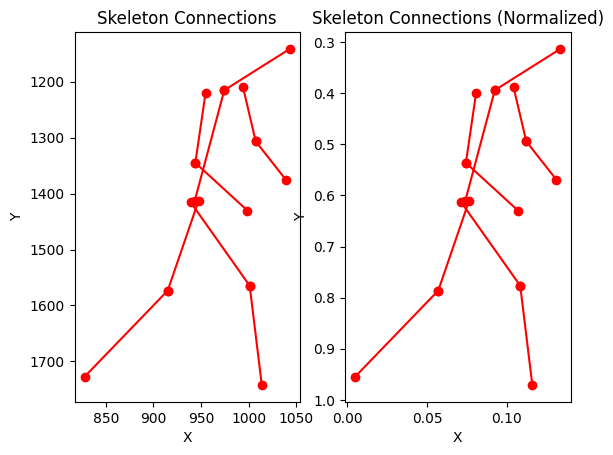

In [10]:
plot_frame(df2_agg, 0)

/Users/jniedziela/Developer/master/time_series_comp/imports.py:173: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  out = ax.plot([start_x, end_x], [start_y, end_y], 'ro-', color=color)


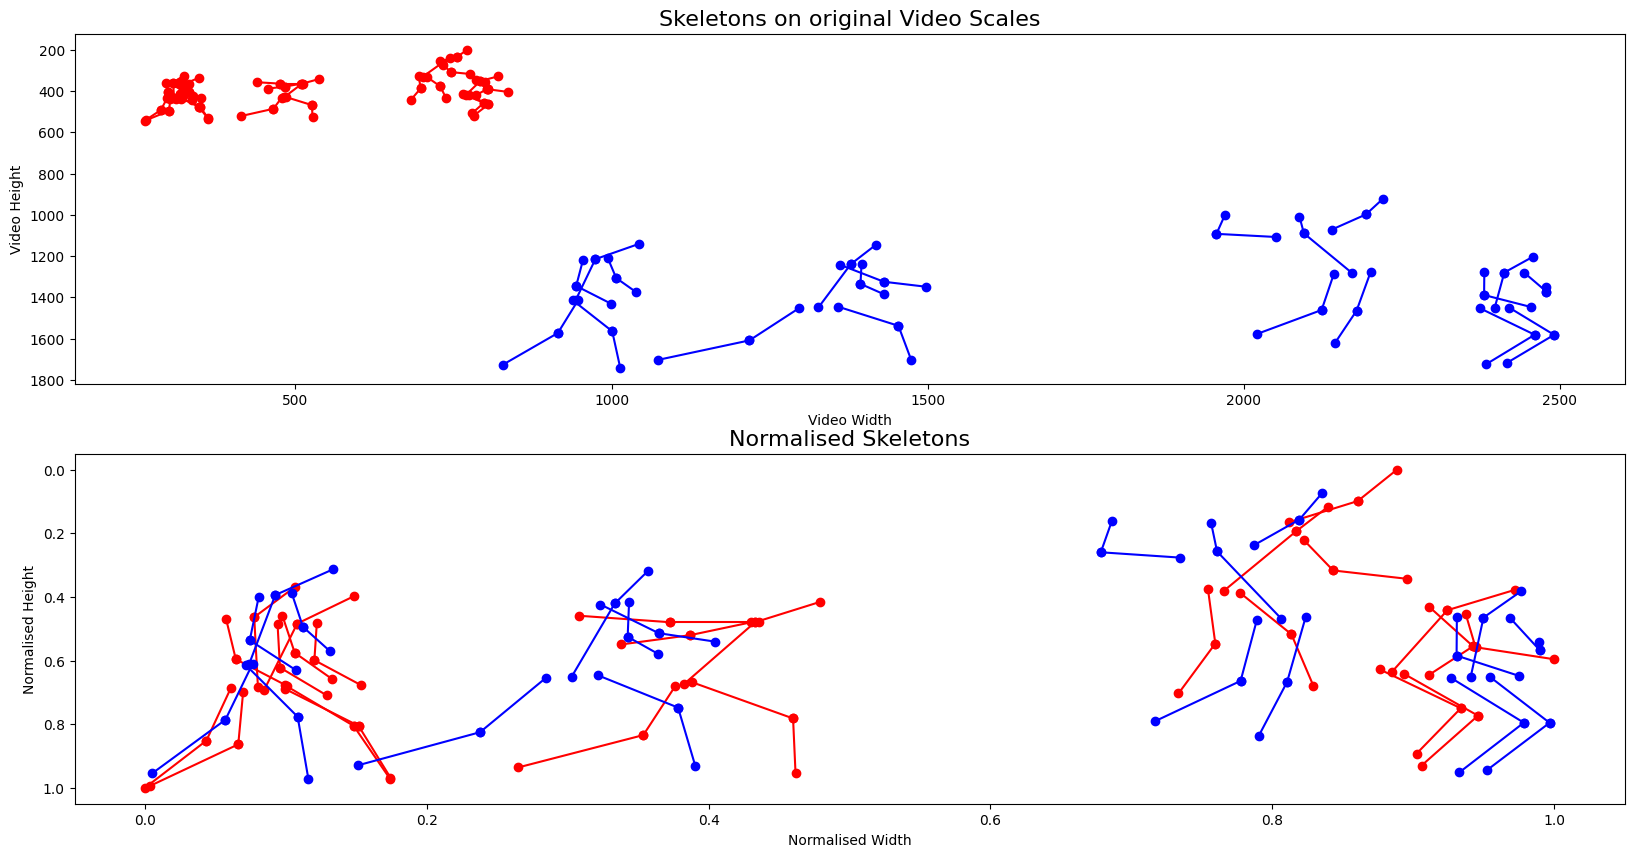

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
# ax[0].invert_yaxis()
# ax[1].invert_yaxis()
for i in range(0, len(df1), 20):
    plot_sequence(df1, i, ax=ax[0], title='Pre-Normalisation Skeletons')
    plot_sequence(df1, i, normalised=True, ax=ax[1], title='Post-Normalisation Skeletons')

for i in range(0, len(df2_agg), 20):
    plot_sequence(df2_agg, i, ax=ax[0], color='b', title='Skeletons on original Video Scales', xlabel='Video Width', ylabel='Video Height')
    plot_sequence(df2_agg, i, normalised=True, ax=ax[1], color='b', title='Normalised Skeletons', xlabel='Normalised Width', ylabel='Normalised Height')